# Intro to Logistic Regression

In [1]:
import numpy as np
from scipy.optimize import minimize

from matplotlib import pyplot as plt

# Classification Problems

Now let's take a look at classification problems from a machine learning point of view.  Remember, in classification problems, outputs are discrete.  For now let's consider a 2-class (or *binary class*) example:
$$
y \in \{0, 1\}
$$

## Logistic regression

For the classification problem above, we want a hypothesis (or *predictor*) that obeys:
$$
0 \leq h_\theta(x) \leq 1
$$

We'll make use of the *sigmoid function* (a.k.a. *logistic function*):
$$
g(z) = \frac{1}{1+e^{-z}}
$$

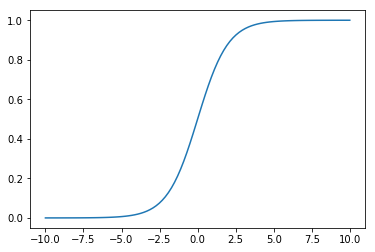

In [2]:
from scipy.special import expit

z = np.linspace(-10, 10, 100)
plt.plot(z, expit(z))

Our hypothesis will be:
$$
h_\theta(x) = g(\theta^Tx) = g(z) = \frac{1}{1+e^{-\theta^Tx}}
$$

So we'll need to fit for parameters $\theta$, which will scale the sigmoid function.

Before we get into learning, let's figure out how to interpret results.  Let's say that we've run the algorithm that we haven't made yet on a training set, and we want to get an estimated output $h_\theta(x)$ at a new input $x$.  Formally, $h_\theta(x)$ is actually:

$$
h_\theta(x) = p(y=1|x;\theta),
$$

the probability of $y=1$, given $x$ and trained parameters $\theta$.

Our hypothesis will make use of the sigmoid:
$$
h_\theta(x) = g(\theta^Tx) = g(z) = \frac{1}{1+e^{-\theta^Tx}}
$$

The dividing line between the hypothesis preferring one category over the other is $h_\theta(x)=g(\theta^Tx)=.5$

Text(0.5, 0, '$z$')

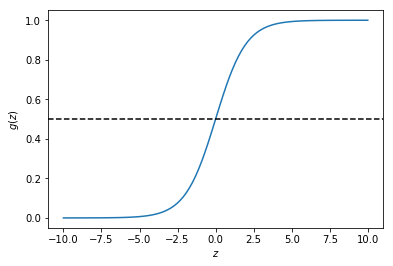

In [3]:
z = np.linspace(-10, 10, 100)
plt.plot(z, expit(z))
plt.axhline(.5, color='k', ls='--')

plt.ylabel(r'$g(z)$')
plt.xlabel(r'$z$')

In other words, when the argument of the sigmoid $z=0$.  So $h_\theta(x) = g(\theta^Tx)\geq0.5$ when $\theta^Tx \geq 0$, which definte our *decision boundary*.

Now let's consider
$$
h_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2)
$$

This defines our decision boundary, and we predict $y=1$ if
$$
\theta_0 + \theta_1 x_1 + \theta_2 x_2 \geq 0 \\
\theta_1 x_1 + \theta_2 x_2 \geq -\theta_0
$$

So if, say $\theta_0 = -5$, $\theta_1 = 1$, and $\theta_2 = 1$, then we have
$$
x_1 + x_2 \geq 5
$$

So we have a line in $x_1$—$x_2$ space that divides the $y=0$ and $y=1$ regions.

## Non-linear decision boundaries

Just like we could extend the idea of linear regression to polynomial regression, we aren't confined to linear decision boundaries with logistic regression.

Consider the hypothesis:
$$
h_\theta(x) = g(\theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_1^2 + \theta_4 x_2^2)
$$

Let's say $\theta_0 = -1$, $\theta_1 = 0$, $\theta_2 = 0$, $\theta_3 = 1$, and $\theta_4 = 1$.  Then we will predict that $y=1$ if:
$$
-1 + x_1^2 + x_2^2 \geq 0
$$

Giving us a circular decision boundary.  We can go to even higher-order polynomials, allowing a very wide range of shapes for our decision boundary.

## Cost function

If we try to use the sigmoid function with our mean squared error cost function, $J(\theta)$ will have lots of local maxima and make minimization very difficult.  First lets modify our notation a bit for cost functions to be more flexible going forward.

Recall our mean squared error cost function
$$
J(\theta) = \frac{1}{m}\sum_{i=1}^m \frac{1}{2} (h_\theta(x^{(i)}) - y^{(i)})^2
$$

We'll define the term being summed as $\mathrm{Cost}$, and in general this term will be a function of $h_\theta(x^{(i)})$ and $y^{(i)}$ (we'll drop the superscripts for brevity).  So for the case of the mean squared error:
$$
\mathrm{Cost}(h_\theta(x), y) = (h_\theta(x) - y)^2
$$

Now let's consider the following cost function:
$$
\mathrm{Cost}(h_\theta(x), y) = \begin{cases} 
      -\log(h_\theta(x)) ~~~~ & \mathrm{if~} y=1 \\
      -\log(1 - h_\theta(x)) ~~~~ & \mathrm{if~} y=0 \\
   \end{cases}
$$

In [4]:
def cost(h, y):
    if y == 1:
        return -np.log(h)
    else:
        return -np.log(1 - h)

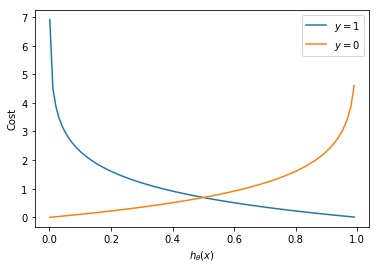

In [5]:
hs = np.linspace(0.001, 1, 100, endpoint=False)

plt.plot(hs, cost(hs, 1), label='$y=1$')
plt.plot(hs, cost(hs, 0), label='$y=0$')

plt.ylabel("Cost")
plt.xlabel(r"$h_\theta(x)$")
plt.legend()

This can be simplified to:
$$
\mathrm{Cost}(h_\theta(x), y) = -y \log(h_\theta(x)) - (1 - y)\log(1 - h_\theta(x))
$$

So our new $J(\theta)$ takes the form
$$
J(\theta) = -\frac{1}{m}\left[\sum_{i=1}^m y^{(i)}\log h_\theta(x^{(i)}) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)})\right]
$$

As usual, we are looking to find the fit parameters $\hat{\theta}$ that minimize $J(\theta)$, and use our hypothesis
$$
h_\hat{\theta}(x) = \frac{1}{1 + e^{-\theta^Tx}},
$$
to predict results for new $x$. Which, again, is interpretted as the probability that $y=1$, $p(y=1|x;\hat{\theta})$.

We can again minimize $J(\theta)$ using gradient decent:

$$
\mathrm{repeat~until~convergence} \{\\
\theta_j = \theta_j - \alpha \frac{\partial}{\partial\theta_j}J(\theta_0, \theta_1) \mathrm{~~~~for~}j=0\mathrm{~and~}j=1
\\\}
$$

A little calculus leads to:
$$
\frac{\partial}{\partial \theta} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

which looks identical to the case for linear regression, but remember our $h_\theta(x)$ is different now.

## Vectorized form

Our new $J(\theta)$:
$$
J(\theta) = -\frac{1}{m}\left[\sum_{i=1}^m y^{(i)}\log h_\theta(x^{(i)}) + (1 - y^{(i)})\log (1 - h_\theta(x^{(i)})\right]
$$

is equivalent to the following in vector form:
$$
J(\theta) = -\frac{1}{m}(y^T \log(h) + (1 - y)^T\log(1 - h))
$$

and our hypothesis in vector form:
$$
h = g(X\theta)
$$

Implying the following form for the gradient decent algorithm
$$
\mathrm{repeat~until~convergence} \{\\
\theta := \theta - \frac{\alpha}{m} X^T(g(X\theta)-\vec{y}) \mathrm{~~~~for~}j=0\mathrm{~and~}j=1
\\\}$$

But we're getting to problems that are too complex for our simple gradient decent approach, so we'll start leaning more heavily on more advanced algorithms (e.g., conjugate gradient, BFGS, L-BFGS, powell) for optimization.  We won't go into the details of how these work, so we'll make use of existing implementations.

In [6]:
def cost(h, y):
    if y == 1:
        return -np.log(h)
    else:
        return -np.log(1 - h)

# Linear decision boundary example

Let's download some two-feature data to work with.  We'll look at student admittance based on their performance on two exams. 

In [7]:
!wget https://raw.githubusercontent.com/JWarmenhoven/Coursera-Machine-Learning/master/notebooks/data/ex2data1.txt

--2019-04-23 05:49:08--  https://raw.githubusercontent.com/JWarmenhoven/Coursera-Machine-Learning/master/notebooks/data/ex2data1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.188.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.188.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘ex2data1.txt.1’

ex2data1.txt.1      100%[===================>]   3.69K  --.-KB/s    in 0.001s  

2019-04-23 05:49:08 (6.95 MB/s) - ‘ex2data1.txt.1’ saved [3775/3775]



In [8]:
!head -n5 ex2data1.txt

34.62365962451697,78.0246928153624,0
30.28671076822607,43.89499752400101,0
35.84740876993872,72.90219802708364,0
60.18259938620976,86.30855209546826,1
79.0327360507101,75.3443764369103,1


In [9]:
data = np.loadtxt('ex2data1.txt', delimiter=',')

Let's build your feature matrix $X$ and result training vector $y$.

In [10]:
X = np.column_stack((np.ones(len(data)), data[:, :2]))
y = data[:, 2].reshape(-1, 1)

In [11]:
def plot_data(data, xlabel='Exam 1 score', ylabel='Exam 2 score', cat0label='rejected', cat1label='admitted'):
    cat0 = data[:, 2] == 0
    cat1 = data[:, 2] == 1

    plt.scatter(data[cat0][:, 0], data[cat0][:, 1], marker='o', label=cat0label)
    plt.scatter(data[cat1][:, 0], data[cat1][:, 1], marker='+', label=cat1label)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

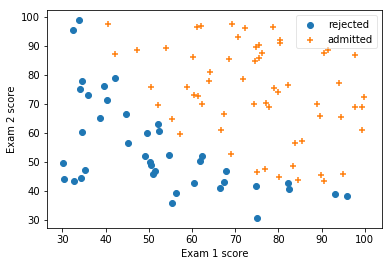

In [12]:
plot_data(data)
plt.legend(framealpha=0.5);

Recall our vectorized form of $J(\theta)$:
$$
J(\theta) = -\frac{1}{m}(y^T \log(h) + (1 - y)^T\log(1 - h))
$$

and sigmoid hypothesis:
$$
h_\theta(x) = g(X\theta)
$$

Let's define our cost function $J(\theta)$ and it's gradient.

In [13]:
def cost(theta, X=X, y=y):
    m = y.size
    h = expit(X.dot(theta))
    
    J = -1/m * (y.T.dot(np.log(h)) + (1 - y).T.dot(np.log(1 - h)))
    J = J[0]
    
    if np.isnan(J):
        return np.inf
    
    return J

Also recall our gradient
$$
\frac{\partial}{\partial \theta} = \frac{1}{m}\sum_{i=1}^m(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}
$$

or, in vector form
$$
\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} X^T(g(X\theta) - y)
$$

**note**: `scipy`'s `minimize` function expects function arguments to be row vectors, so we're going to need to specify our starting point in row-vector form, and make sure the gradient returns a row-vector result.

In [14]:
def cost_gradient(theta, X=X, y=y):
    m = y.size
    h = expit(X.dot(theta.reshape(-1, 1)))
    
    gradient = 1/m * X.T.dot(h - y)
    
    return gradient.flatten()

In [15]:
theta0 = np.zeros(X.shape[1])

c = cost(theta0, X, y)
c_grad = cost_gradient(theta0, X, y)
print('starting theta: \n', theta0)
print('Cost: \n', c)
print('Grad: \n', c_grad)

starting theta: 
 [0. 0. 0.]
Cost: 
 0.693147180559945
Grad: 
 [ -0.1        -12.00921659 -11.26284221]


Let's minimize this thing.

In [16]:
res = minimize(cost, theta0, method=None, jac=cost_gradient, options={'maxiter':400})

theta_opt = res.x.reshape((-1, 1))

res

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


      fun: 0.2034977015895099
 hess_inv: array([[ 2.85339493e+03, -2.32908823e+01, -2.27416470e+01],
       [-2.32908823e+01,  2.04489131e-01,  1.72969525e-01],
       [-2.27416470e+01,  1.72969525e-01,  1.96170322e-01]])
      jac: array([-2.68557637e-09,  4.36433475e-07, -1.39671758e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

With our model now fit, we can ask what the probability is for a student's acceptance if they scored a 45 on Exam 1, and 85 on Exam 2. 

In [17]:
def h(X, theta=theta_opt):
    return expit(X.dot(theta))

test_point = np.array([1, 45, 85])

print("{}".format(h(test_point)[0]))

0.7762903249331021


## Decision Boundary

Let's now declare a decesion boundary, and say that we predict $y=1$ if $h_\theta(x) \geq 0.5$.

In [18]:
def predict(X, theta=theta_opt, threshold=0.5):
    p = h(X, theta) >= threshold
    return p.astype('int')

Since our data set is classified, we can assess our training accuracy by seeing how well the model predicts the results from the training data.

In [19]:
p = predict(X)

accuracy = 100 * np.count_nonzero(p == y)/p.size
print("training accuracy: {}%".format(accuracy))

training accuracy: 89.0%


Not bad.  Let's see where the decision boundary falls with respect to the data.

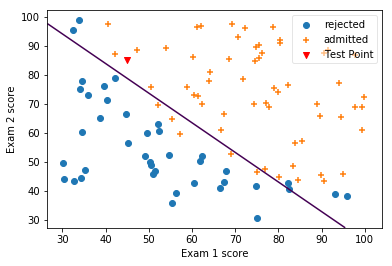

In [20]:
plot_data(data)

x1low, x1high = plt.xlim()
x2low, x2high = plt.ylim()
xx1, xx2 = np.meshgrid(np.linspace(x1low, x1high, 100), np.linspace(x2low, x2high, 100))

testX = np.column_stack([np.ones(xx1.ravel().shape[0]), xx1.ravel(), xx2.ravel()])
hh = h(testX).reshape(xx1.shape)

plt.contour(xx1, xx2, hh, [0.5])
plt.scatter(test_point[1], test_point[2], color='r', marker='v', label='Test Point')
plt.legend(framealpha=0.5);

Now lets consider a different hypothesis

# Polynomial decision boundary example

For this example we'll download some new two-feature training data.

In [21]:
!wget https://raw.githubusercontent.com/JWarmenhoven/Coursera-Machine-Learning/master/notebooks/data/ex2data2.txt

--2019-04-23 05:49:17--  https://raw.githubusercontent.com/JWarmenhoven/Coursera-Machine-Learning/master/notebooks/data/ex2data2.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.188.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.188.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2233 (2.2K) [text/plain]
Saving to: ‘ex2data2.txt.1’

ex2data2.txt.1      100%[===================>]   2.18K  --.-KB/s    in 0.001s  

2019-04-23 05:49:17 (4.02 MB/s) - ‘ex2data2.txt.1’ saved [2233/2233]



In [22]:
!head -n5 ex2data2.txt

0.051267,0.69956,1
-0.092742,0.68494,1
-0.21371,0.69225,1
-0.375,0.50219,1
-0.51325,0.46564,1


(118, 3)


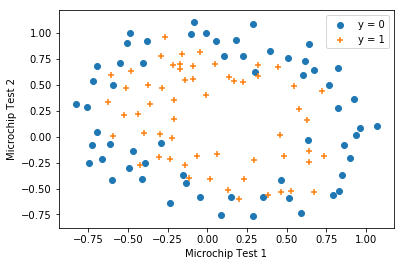

In [23]:
data2 = np.loadtxt('ex2data2.txt', delimiter=',')
print(data2.shape)

plot_data(data2, xlabel='Microchip Test 1', ylabel='Microchip Test 2', cat0label='y = 0', cat1label='y = 1')
plt.legend()

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:
X2 = data2[:, :2]
y2 = data2[:, 2].reshape((-1, 1))

In [26]:
poly = PolynomialFeatures(2)
XX = poly.fit_transform(X2)
XX.shape # 1 x1 x2 x1^2 x1x2 x2^2

(118, 6)

In [27]:
cost2 = lambda theta: cost(theta, X=XX, y=y2)
cost2_gradient = lambda theta: cost_gradient(theta, X=XX, y=y2)

In [28]:
theta0 = np.zeros(XX.shape[1])
cost2(theta0)

0.693147180559945

In [29]:
res2 = minimize(cost2, theta0, method=None, jac=cost2_gradient, options={'maxiter':3000})

theta_opt2 = res2.x.reshape((-1, 1))
res2

      fun: 0.34810531348342155
 hess_inv: array([[  86.09462492,   45.69750127,   57.71347167, -169.8683929 ,
         -98.09068439, -188.51088515],
       [  45.69750127,   68.39622247,   48.15408551, -116.01710165,
        -104.73160783, -106.68145904],
       [  57.71347167,   48.15408551,   80.49330754, -115.19141089,
        -110.57327368, -168.0849988 ],
       [-169.8683929 , -116.01710165, -115.19141089,  456.15235588,
         262.19279895,  341.21498664],
       [ -98.09068439, -104.73160783, -110.57327368,  262.19279895,
         396.58582936,  279.45403928],
       [-188.51088515, -106.68145904, -168.0849988 ,  341.21498664,
         279.45403928,  517.16408891]])
      jac: array([-5.99475933e-06, -2.37396741e-07, -9.70106272e-07, -2.18005144e-06,
       -8.04484807e-07, -1.26264365e-06])
  message: 'Optimization terminated successfully.'
     nfev: 44
      nit: 42
     njev: 44
   status: 0
  success: True
        x: array([  5.16953241,   3.24770461,   4.16640802, -12.0

In [30]:
p = predict(XX, theta_opt2)

accuracy = 100 * np.count_nonzero(p == y2)/p.size
print("training accuracy: {}%".format(accuracy))

training accuracy: 85.59322033898304%


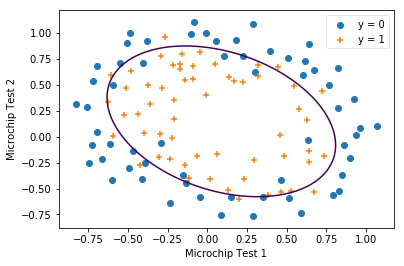

In [31]:
plot_data(data2, xlabel='Microchip Test 1', ylabel='Microchip Test 2', cat0label='y = 0', cat1label='y = 1')

x1low, x1high = plt.xlim()
x2low, x2high = plt.ylim()
xx1, xx2 = np.meshgrid(np.linspace(x1low, x1high, 100), np.linspace(x2low, x2high, 100))

testX = np.column_stack([xx1.ravel(), xx2.ravel()])

hh = h(poly.fit_transform(testX), theta_opt2).reshape(xx1.shape)

plt.contour(xx1, xx2, hh, [0.5])
plt.legend(framealpha=0.5);